In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt


In [59]:
def plot_training_curves(
    acc, labels, title,
    save_name, x_label, y_label,
    legend_label
):
    fig, ax = plt.subplots(figsize=(20,6))
#     ax.bar(label, acc)
    
    plt.scatter(range(len(acc)), acc, label=legend_label, s=100)
#     ax.plot(acc, label="Train Loss")
#     ax.plot(val_loss, label="Validation Loss")
    ax.legend(loc='best')
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    plt.xticks(ticks=np.arange(len(labels)), labels=labels)
    
    for i, txt in enumerate(acc):
        plt.annotate(f"{acc[i]:.4}", (i, acc[i]))
    
    plt.savefig(f"./{save_name}")
    plt.show()

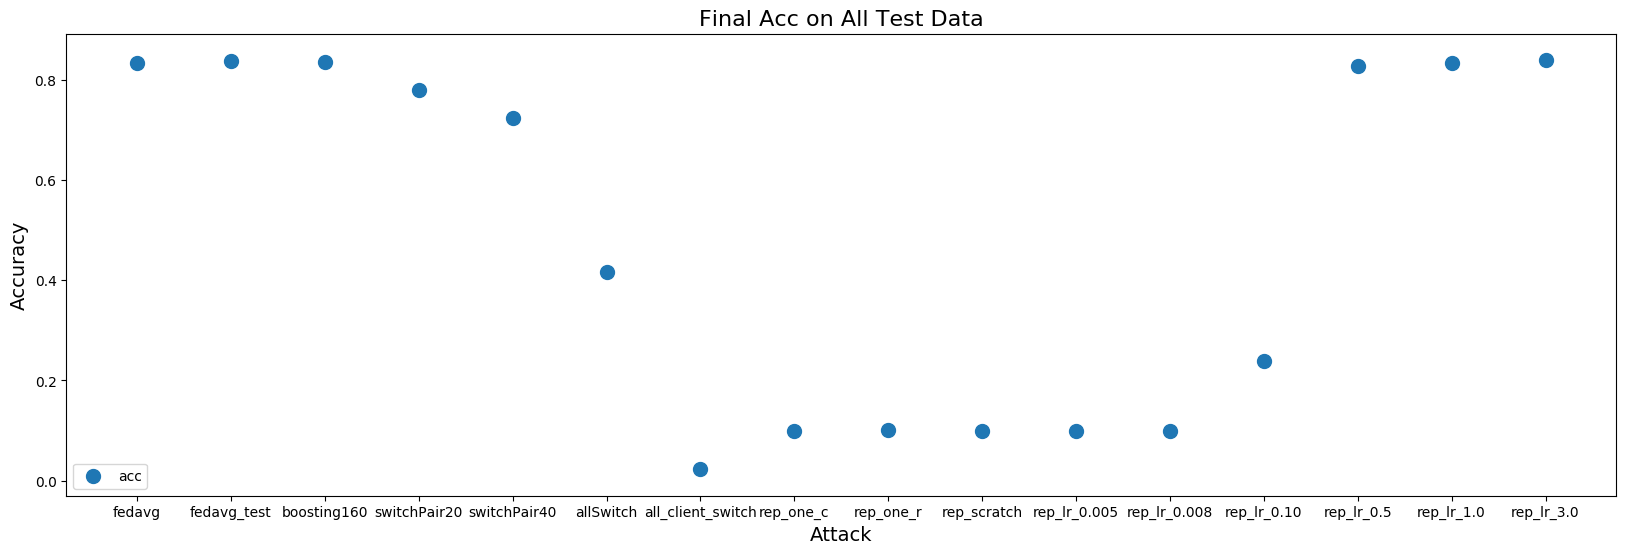

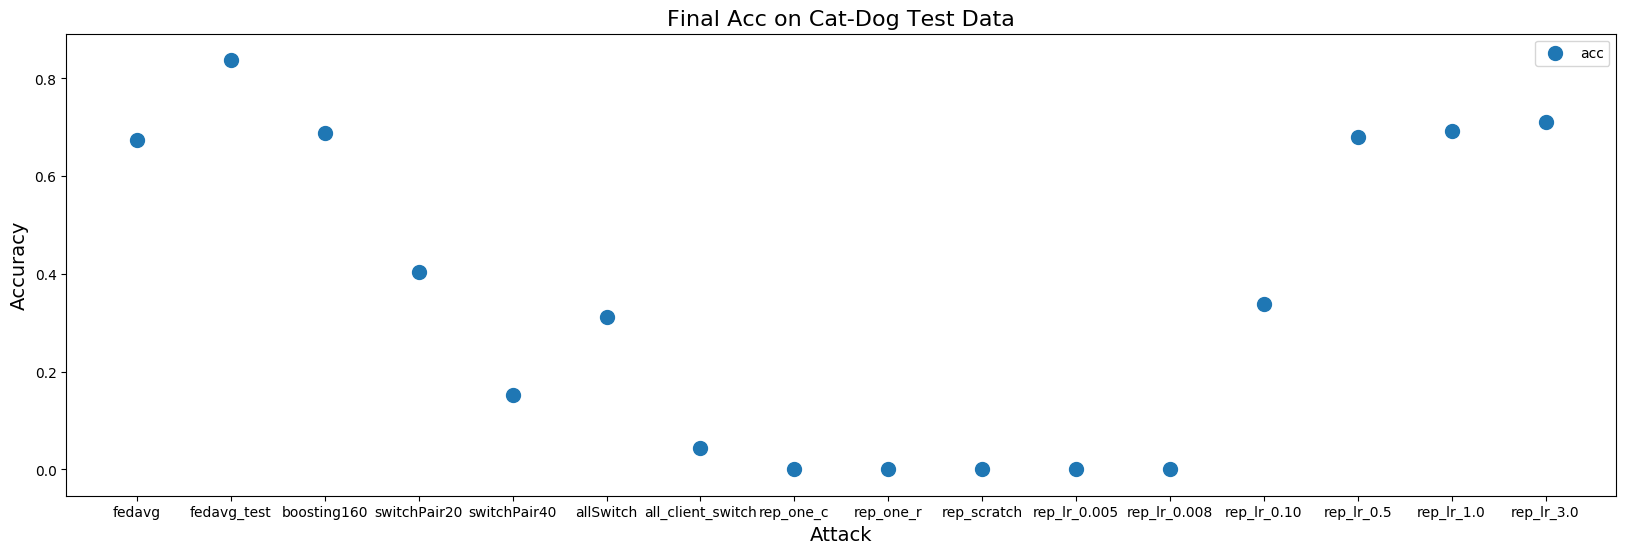

In [15]:
boosing = [
    f"/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting{(2**i)*20}/eval/" for i in range(4)
]

labels = [
    "fedavg",
    "fedavg_test",
    
#     "boosting20",
#     "boosting40",
#     "boosting80",
    "boosting160",
    
    "switchPair20",
    "switchPair40",
    "allSwitch",
    "all_client_switch",
    
#     "replace",
#     "rep_consist",
#     "rep_one_c_fail",
    "rep_one_c",
    "rep_one_r",
    "rep_scratch",
    
    "rep_lr_0.005", 
    "rep_lr_0.008", 
    "rep_lr_0.10", 
    "rep_lr_0.5", # 0.5
    "rep_lr_1.0", # 1.0
    "rep_lr_3.0", # 3.0
]

all_label_acc = [
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/test/rep_test_client_w_lr_30000/eval/all_acc.npy",
    
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting20/eval/boosting20_all_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting40/eval/boosting40_all_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting80/eval/boosting80_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting160/eval/boosting160_all_acc.npy",
    
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/switchPair20_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/switchPair40/eval/switchPair40_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/all_clients_all_switch/eval/all_acc.npy",
    
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement/eval/replace_all_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement_consist/eval/replace_all_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement_one_atk_fail/eval/replace_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replacement_one_atk/eval/replace_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replacement_one_round/eval/replace_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/from_scratch_one_r/eval/scratch_all_acc.npy",
    
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_005/eval/rep_lr005_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_008/eval/rep_lr008_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_0010/eval/rep_lr0010_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_0/eval/rep_lr0_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_1/eval/rep_lr1_all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_3/eval/rep_lr3_all_acc.npy",
    
]
pair_label_acc = [
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/test/rep_test_client_w_lr_30000/eval/all_acc.npy",
    
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting20/eval/boosting20_pair_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting40/eval/boosting40_pair_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting80/eval/boosting80_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/boosting160/eval/boosting160_pair_acc.npy",
    
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/switchPair20_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/switchPair40/eval/switchPair40_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/all_clients_all_switch/eval/pair_acc.npy",
   
    
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement/eval/replace_pair_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement_consist/eval/replace_pair_acc.npy",
#     "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replace/replacement_one_atk_fail/eval/replace_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replacement_one_atk/eval/replace_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/replacement_one_round/eval/replace_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/from_scratch_one_r/eval/scratch_pair_acc.npy",
    
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_005/eval/rep_lr005_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_008/eval/rep_lr008_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_0010/eval/rep_lr0010_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_0/eval/rep_lr0_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_1/eval/rep_lr1_pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep_lr_3/eval/rep_lr3_pair_acc.npy",
    
]

all_label_avg_acc = []
for i in all_label_acc:
    res = np.load(i)
    all_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )

plot_training_curves(
    all_label_avg_acc, labels, "Final Acc on All Test Data",
    "test_on_all_label.pdf"
)

pair_label_avg_acc = []
for i in pair_label_acc:
    res = np.load(i)
    pair_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )
    
plot_training_curves(
    pair_label_avg_acc, labels, "Final Acc on Cat-Dog Test Data",
    "test_on_pair_label.pdf"
)


labels = [
    "fedavg",
    "fedavg_test",
    
#     "boosting20",
#     "boosting40",
#     "boosting80",
    "boosting160",
    
    "switchPair20",
    "switchPair40",
    "allSwitch",
    
#     "replace",
#     "rep_consist",
#     "rep_one_c_fail",
    "rep_one_c",   # 0.03
    "rep_one_r",   # 0.03
    "rep_scratch", # 0.03
    
    # all one round & one client
    "rep_lr_0.005", 
    "rep_lr_0.008", 
    "rep_lr_0.10", 
    "rep_lr_0.5", 
    "rep_lr_1.0", 
    "rep_lr_3.0", 
]

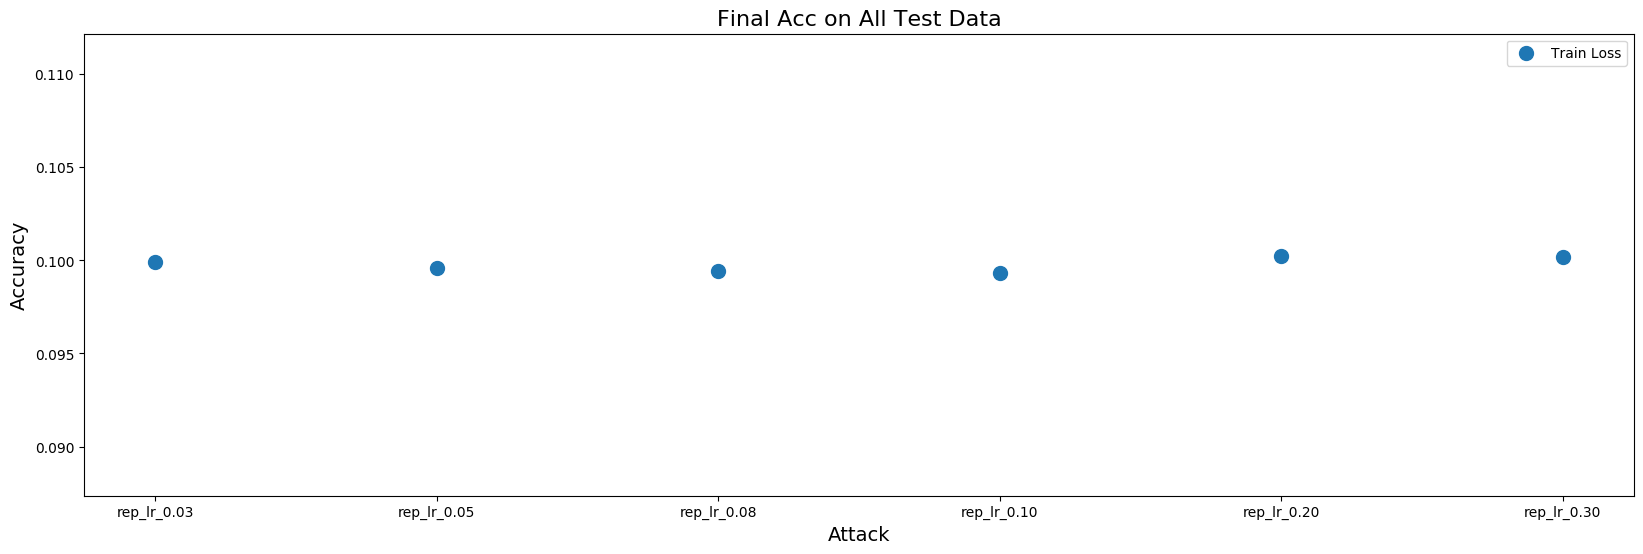

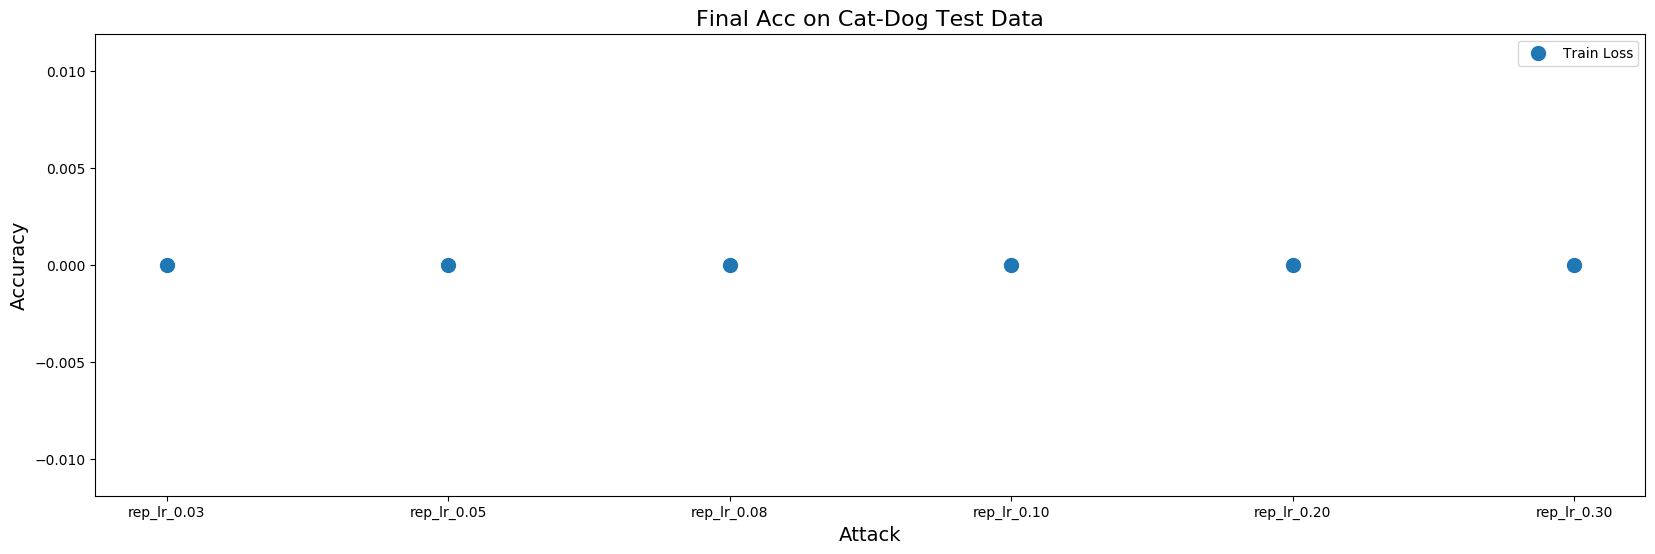

In [3]:
# using 1 / client weight


labels = [
    "rep_lr_0.03", 
    "rep_lr_0.05", 
    "rep_lr_0.08", 
    "rep_lr_0.10",
    "rep_lr_0.20", 
    "rep_lr_0.30", 
]

all_label_acc = [
    
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_03/eval/all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_05/eval/all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_08/eval/all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_010/eval/all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_020/eval/all_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_030/eval/all_acc.npy",
]
pair_label_acc = [
    
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_03/eval/pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_05/eval/pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_08/eval/pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_010/eval/pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_020/eval/pair_acc.npy",
    "/home/ubuntu/Documents/jiarui/experiments/FedAvg/cifar10/rep__client_w_lr_030/eval/pair_acc.npy",
]

all_label_avg_acc = []
for i in all_label_acc:
    res = np.load(i)
    all_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )

plot_training_curves(
    all_label_avg_acc, labels, "Final Acc on All Test Data",
    "test_on_all_label.pdf"
)

pair_label_avg_acc = []
for i in pair_label_acc:
    res = np.load(i)
    pair_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )
    
plot_training_curves(
    pair_label_avg_acc, labels, "Final Acc on Cat-Dog Test Data",
    "test_on_pair_label.pdf"
)

In [13]:
lr_set = [0.03, 0.05, 0.08, 0.10, 0.20, 0.30, 0.50]
client_weights = [10]
base_path = "/home/ubuntu/Documents/jiarui/experiments/lr_and_w"

labels = [
    "rep_lr_0.03", 
    "rep_lr_0.05", 
    "rep_lr_0.08", 
    "rep_lr_0.10",
    "rep_lr_0.20", 
    "rep_lr_0.30", 
    "rep_lr_0.50"
]

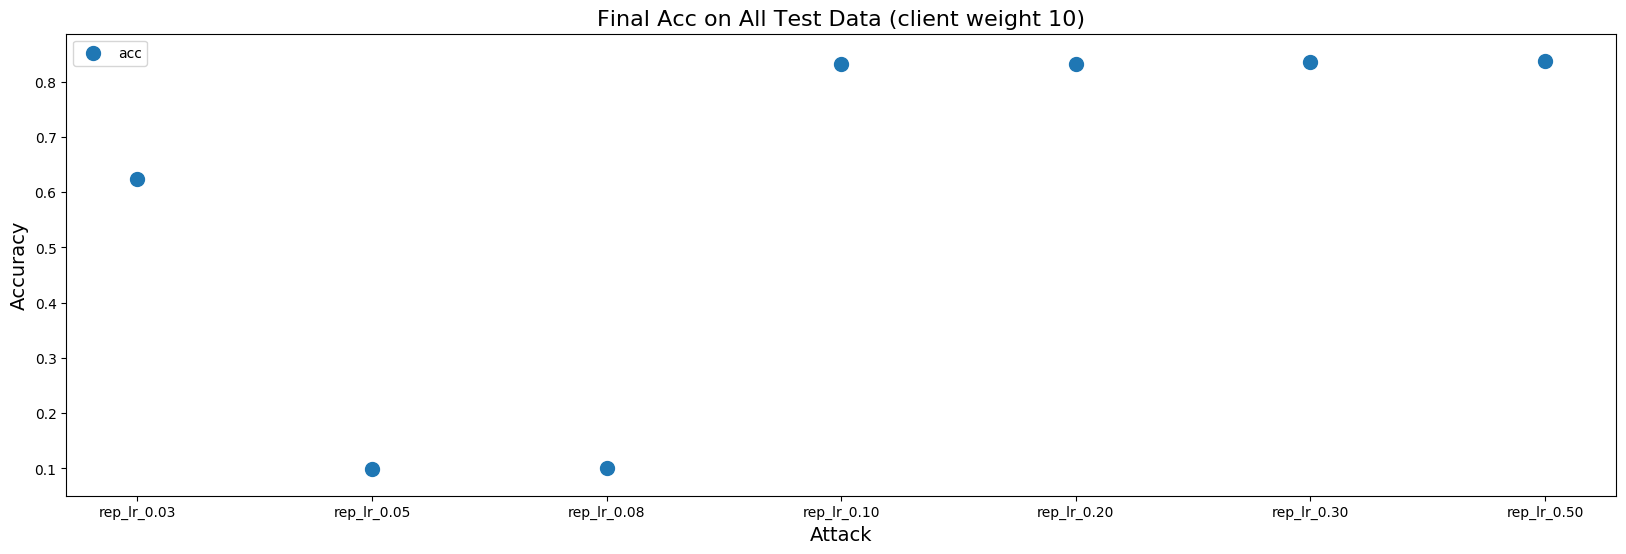

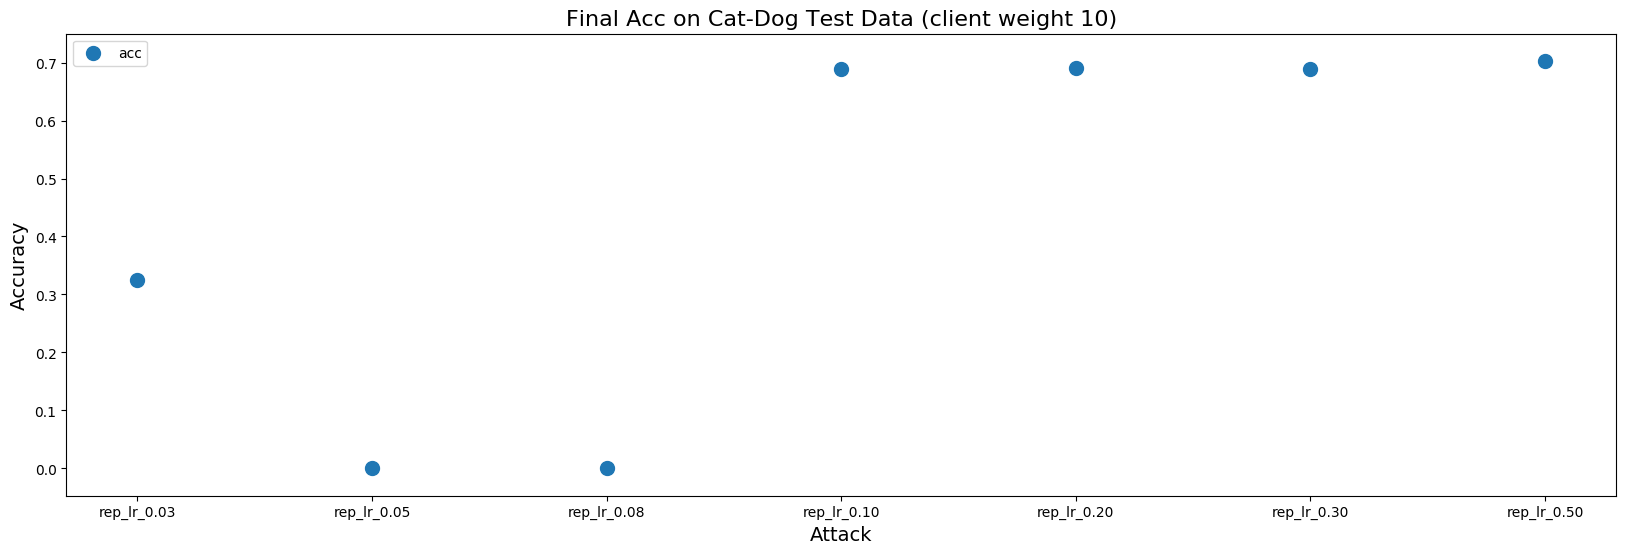

In [14]:
for client_weight in client_weights:
    all_label_acc = [
        f"{base_path}/weight{client_weight}/rep_test_client_w_lr_{ int(lr * 100) }/eval/all_acc.npy" for lr in lr_set

    ]

    pair_label_acc = [
        f"{base_path}/weight{client_weight}/rep_test_client_w_lr_{ int(lr * 100) }/eval/pair_acc.npy" for lr in lr_set

    ]

    all_label_avg_acc = []
    for i in all_label_acc:
        res = np.load(i)
        all_label_avg_acc.append(
            np.sum(res) / (res.shape[0] * res.shape[1])
        )

    plot_training_curves(
        all_label_avg_acc, labels, F"Final Acc on All Test Data (client weight {client_weight})",
        f"test_on_all_label_cw_{client_weight}.pdf"
    )

    pair_label_avg_acc = []
    for i in pair_label_acc:
        res = np.load(i)
        pair_label_avg_acc.append(
            np.sum(res) / (res.shape[0] * res.shape[1])
        )
        
    plot_training_curves(
        pair_label_avg_acc, labels, f"Final Acc on Cat-Dog Test Data (client weight {client_weight})",
        f"test_on_pair_label_cw_{client_weight}.pdf"
    )

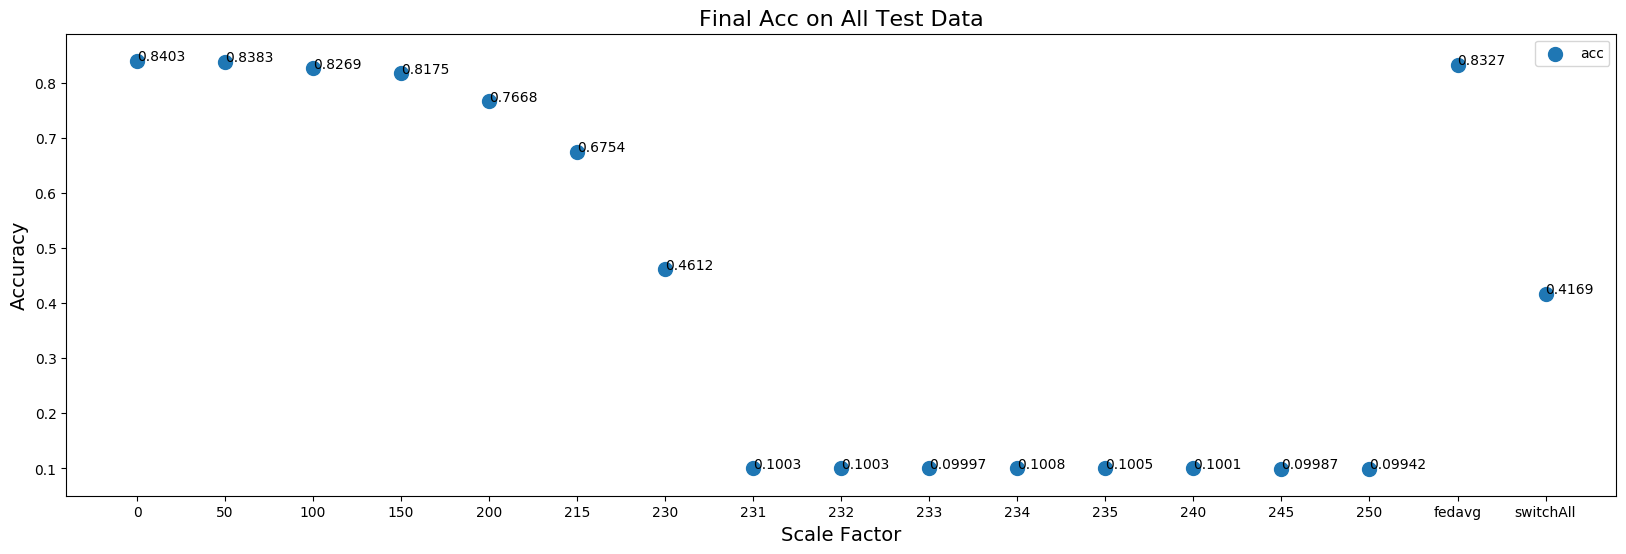

In [60]:
base_path = "/home/ubuntu/Documents/jiarui/experiments/lr_and_w"
scale_set = [scale for scale in range(0, 200, 50)]
scale_set += [i for i in range(200, 250, 15)]
scale_set += [231, 232, 233, 234, 235, 240, 250]
scale_set.sort()

labels = [
    str(scale) for scale in scale_set
]

all_label_acc = [
    f"{base_path}/rep_scale{ scale }/eval/all_acc.npy" for scale in scale_set
]

pair_label_acc = [
    f"{base_path}/rep_scale{ scale }/eval/pair_acc.npy" for scale in scale_set
]

all_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_all_acc.npy"
)
pair_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_pair_acc.npy"
)
labels.append("fedavg")

all_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_all_acc.npy"
)
pair_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_pair_acc.npy"
)
labels.append("switchAll")



all_label_avg_acc = []
for i in all_label_acc:
    res = np.load(i)
    all_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )

plot_training_curves(
    all_label_avg_acc, labels, F"Final Acc on All Test Data",
    f"rep_gt150.pdf", "Scale Factor", "Accuracy",
    "acc"
)

# pair_label_avg_acc = []
# for i in pair_label_acc:
#     res = np.load(i)
#     pair_label_avg_acc.append(
#         np.sum(res) / (res.shape[0] * res.shape[1])
#     )

# plot_training_curves(
#     pair_label_avg_acc, labels, f"Final Acc on Cat-Dog Test Data",
#     f"rep_pair1.pdf", "Scale Factor", "Accuracy"
# )

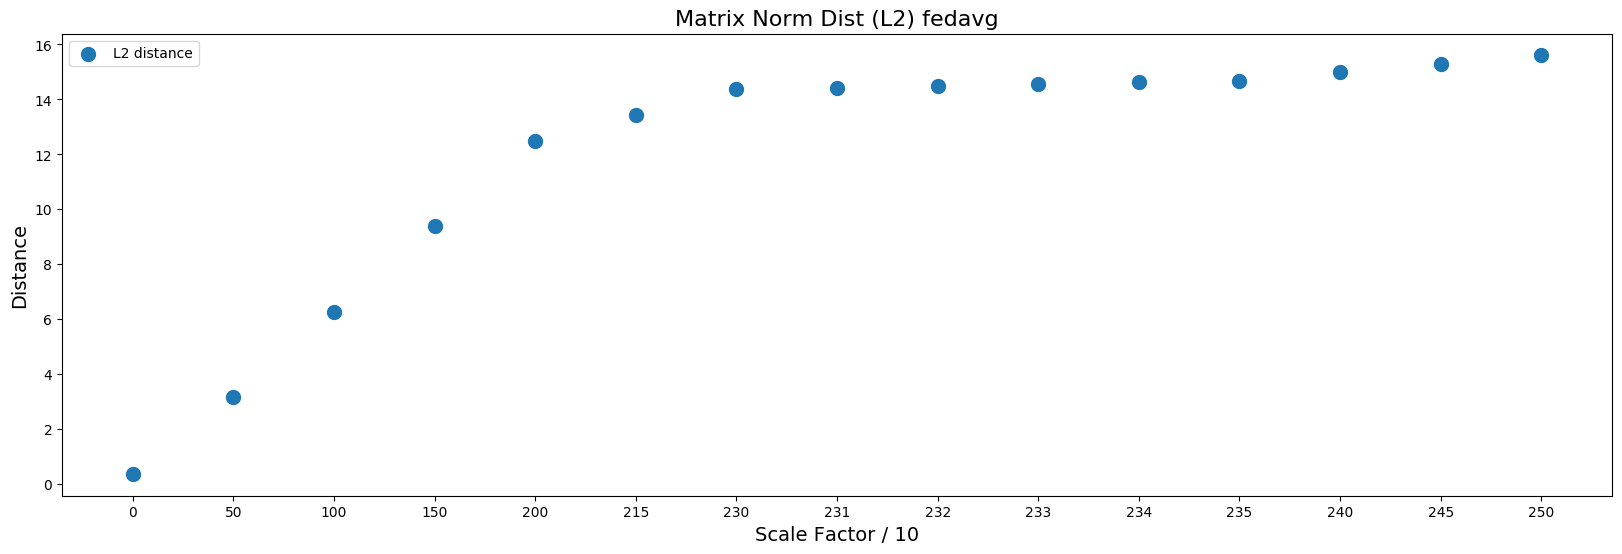

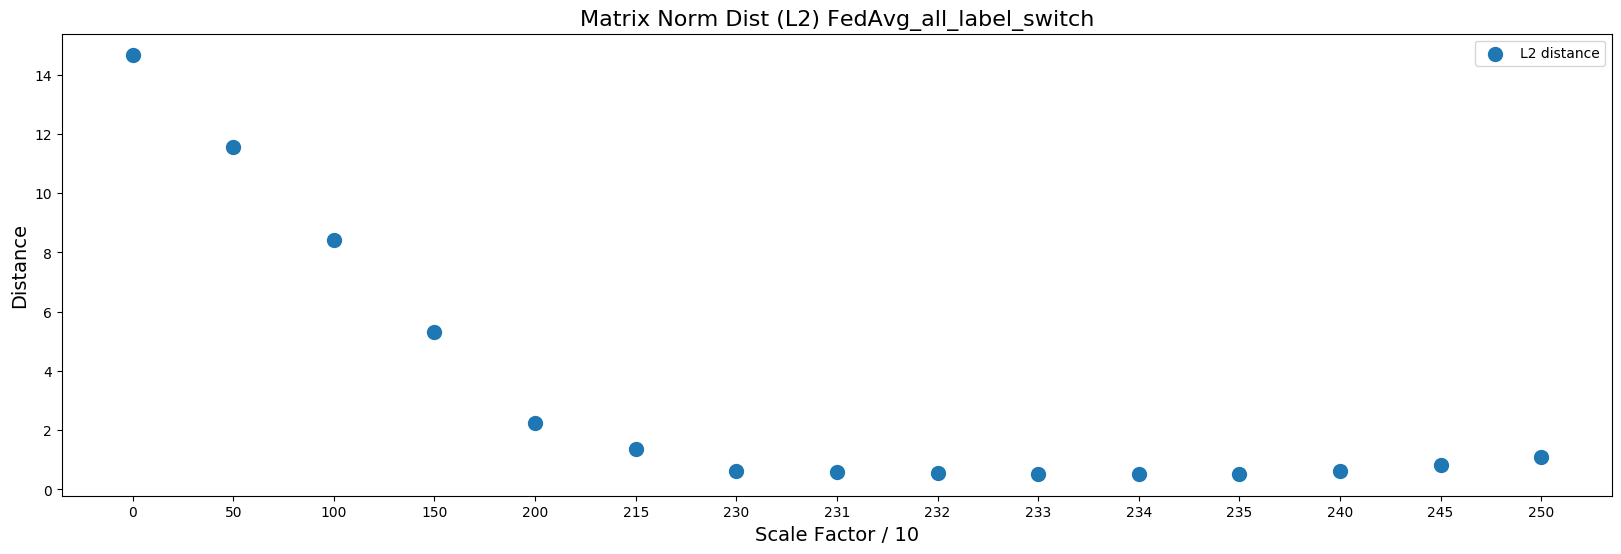

In [37]:
scale_set = [scale for scale in range(0, 200, 50)]
scale_set += [i for i in range(200, 250, 15)]
scale_set += [231, 232, 233, 234, 235, 240, 250]
scale_set.sort()

labels = [
    str(scale) for scale in scale_set
]

titles = [
    "fedavg",
    "FedAvg_all_label_switch"
]

all_dist_path = [
    "/home/ubuntu/Documents/jiarui/experiments/lr_and_w/fedavg.npy",
    "/home/ubuntu/Documents/jiarui/experiments/lr_and_w/FedAvg_all_label_switch.npy",
]

all_dist = [
    np.load(path) for path in all_dist_path
]

for i, array in enumerate(all_dist):
    plot_training_curves(
        array, labels, f"Matrix Norm Dist (L2) {titles[i]}",
        f"dist_{titles[i]}.pdf", "Scale Factor / 10", "Distance",
        "L2 distance"
    )

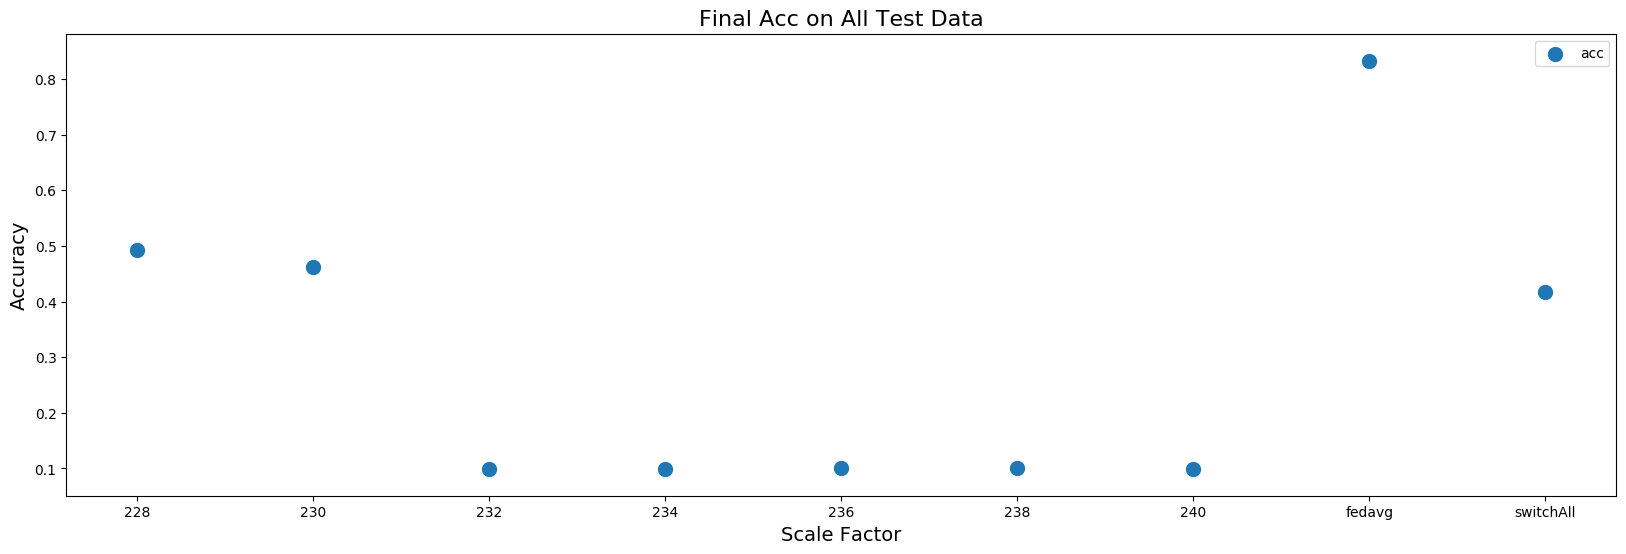

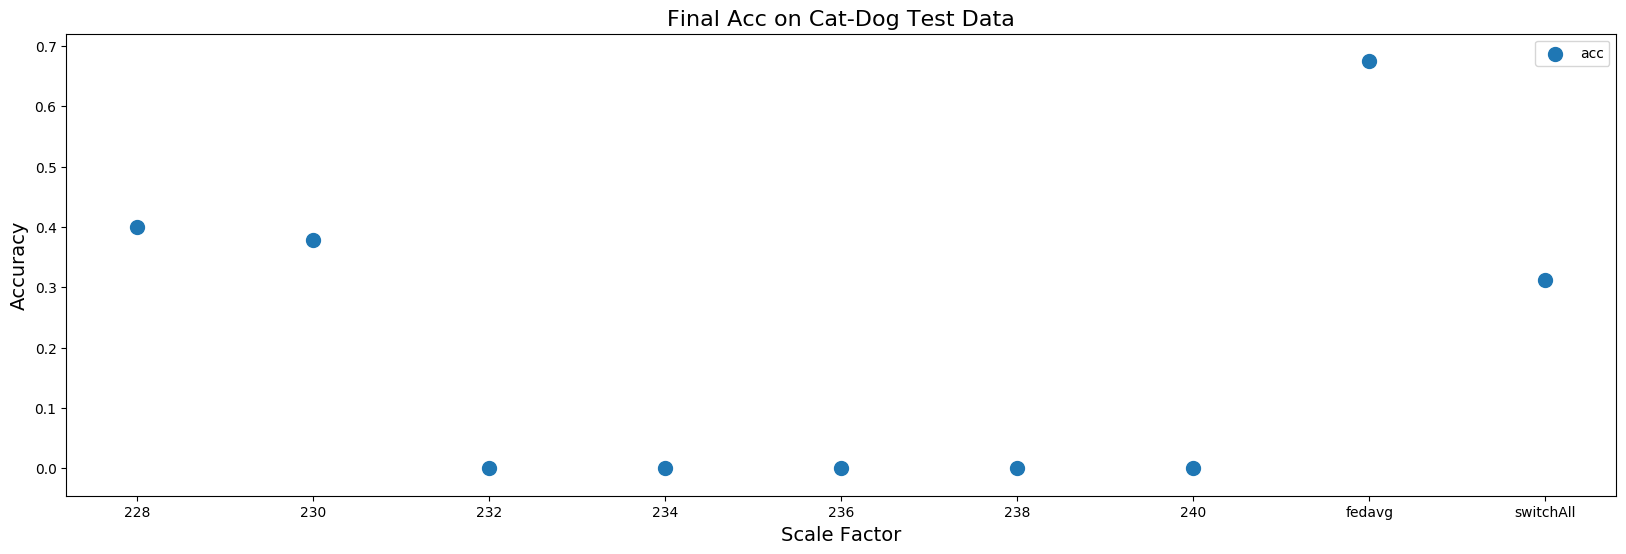

In [42]:
base_path = "/home/ubuntu/Documents/jiarui/experiments/lr_and_w/new_replace_code"

scale_set = [scale for scale in range(228, 241, 2)]
scale_set.sort()

labels = [
    str(scale) for scale in scale_set
]

all_label_acc = [
    f"{base_path}/rep_scale{ scale }/eval/all_acc.npy" for scale in scale_set
]

pair_label_acc = [
    f"{base_path}/rep_scale{ scale }/eval/pair_acc.npy" for scale in scale_set
]

all_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_all_acc.npy"
)
pair_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_pair_acc.npy"
)
labels.append("fedavg")

all_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_all_acc.npy"
)
pair_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_pair_acc.npy"
)
labels.append("switchAll")



all_label_avg_acc = []
for i in all_label_acc:
    res = np.load(i)
    all_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )

plot_training_curves(
    all_label_avg_acc, labels, F"Final Acc on All Test Data",
    f"new_rep_code_all.pdf", "Scale Factor", "Accuracy",
    "acc"
)

pair_label_avg_acc = []
for i in pair_label_acc:
    res = np.load(i)
    pair_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )

plot_training_curves(
    pair_label_avg_acc, labels, f"Final Acc on Cat-Dog Test Data",
    f"new_rep_code_pair.pdf", "Scale Factor", "Accuracy",
    "acc"
)

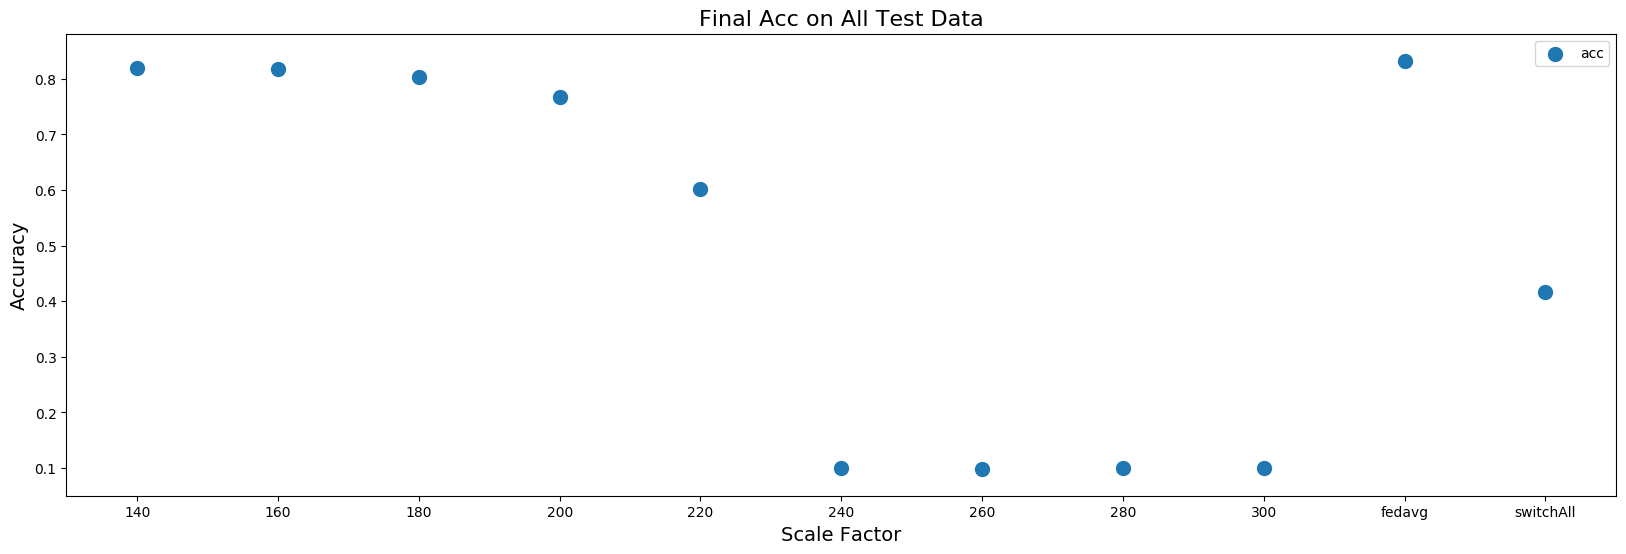

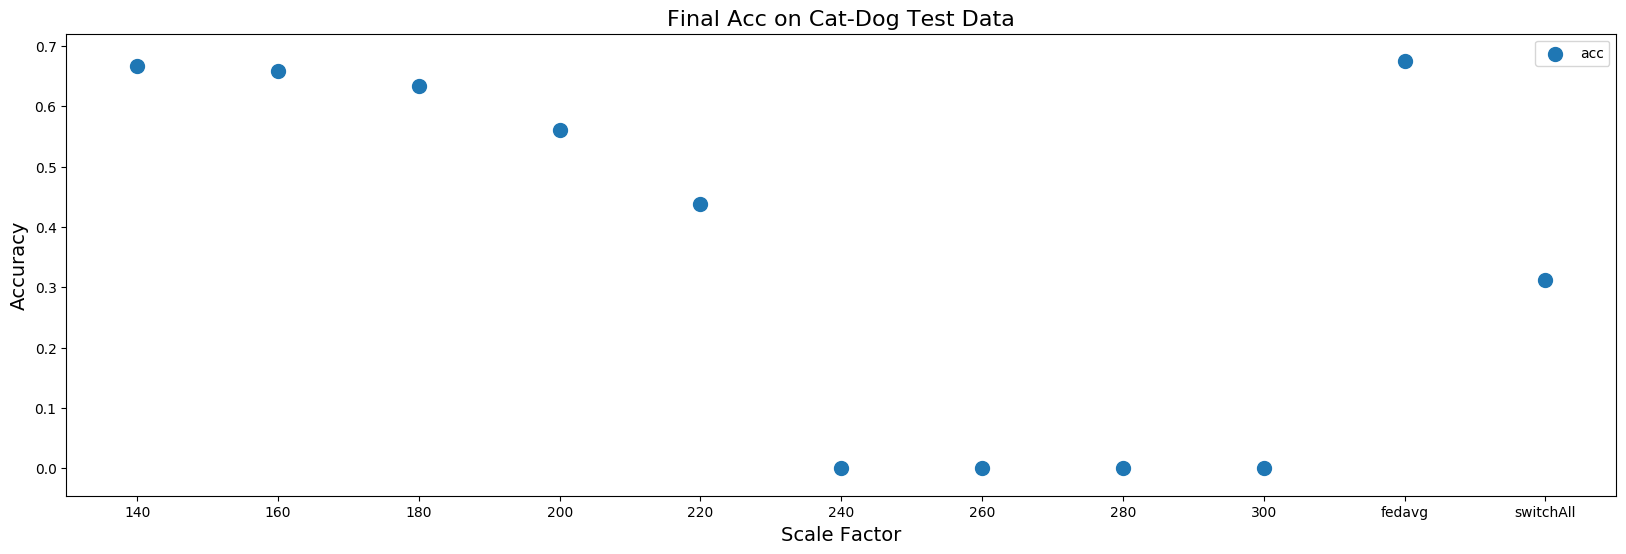

In [43]:
base_path = "/home/ubuntu/Documents/jiarui/experiments/fedavg/gt_epoch200/replace"

scale_set = [scale for scale in range(140, 301, 20)]
scale_set.sort()

labels = [
    str(scale) for scale in scale_set
]

all_label_acc = [
    f"{base_path}/rep_scale{ scale }/eval/all_acc.npy" for scale in scale_set
]

pair_label_acc = [
    f"{base_path}/rep_scale{ scale }/eval/pair_acc.npy" for scale in scale_set
]

all_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_all_acc.npy"
)
pair_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_pair_acc.npy"
)
labels.append("fedavg")

all_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_all_acc.npy"
)
pair_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_pair_acc.npy"
)
labels.append("switchAll")



all_label_avg_acc = []
for i in all_label_acc:
    res = np.load(i)
    all_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )

plot_training_curves(
    all_label_avg_acc, labels, F"Final Acc on All Test Data",
    f"fedavg200_all.pdf", "Scale Factor", "Accuracy",
    "acc"
)

pair_label_avg_acc = []
for i in pair_label_acc:
    res = np.load(i)
    pair_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )

plot_training_curves(
    pair_label_avg_acc, labels, f"Final Acc on Cat-Dog Test Data",
    f"fedavg200_pair.pdf", "Scale Factor", "Accuracy",
    "acc"
)

In [67]:
base_path = "/home/ubuntu/Documents/jiarui/experiments/clients_distance"

scale_set = [scale for scale in range(225, 241, 1)]
scale_set.sort()

labels = [
    str(scale) for scale in scale_set
]

all_client_dist_path = [
    f"{base_path}/rep_scale{ scale }/client_dist_to_prev_gt_in_each_round.npy" for scale in scale_set
]


for i, path in enumerate(all_client_dist_path):
    temp = np.load(path)
#     print(temp.shape)
    print("---------------------------------------")
    print(f"Scaling Factor >>> {scale_set[i]}")
    print(f"all clients dist float \n{temp[0][0]}")
    print(f"all clients dist nonfloat \n{temp[0][1]}")
    print("\n")


# all_label_avg_acc = []
# for i in all_label_acc:
#     res = np.load(i)
#     all_label_avg_acc.append(
#         np.sum(res) / (res.shape[0] * res.shape[1])
#     )

# plot_training_curves(
#     all_label_avg_acc, labels, F"Final Acc on All Test Data",
#     f"fedavg200_all.pdf", "Scale Factor", "Accuracy",
#     "acc"
# )



---------------------------------------
Scaling Factor >>> 225
all clients dist float 
[3.30223488e+04 1.15666903e+01 2.25224705e+01 7.03028112e+00
 1.78028142e+01 1.36487716e+01 2.31241394e+01 1.63677104e+01
 1.44845939e+01 2.04829308e+01 2.26085139e+01 1.70886975e+01
 2.01909542e+01 1.19973000e+01 2.19994397e+01 2.06291872e+01
 6.30969984e+00 1.89197446e+01 4.79633028e+00 1.18565351e+01
 1.75874178e+01 1.65676889e+01 1.68134730e+01 3.94978854e+00
 6.53161258e+00 1.41244780e+01 1.30130031e+01 2.71964551e+01
 7.01974292e+00 9.93944617e+00 2.17664884e+01 1.64444788e+01
 6.59974169e+00 1.03808826e+01 1.07462594e+01 1.17238302e+01
 1.16755651e+01 1.21344510e+01 1.19274472e+01 1.89074687e+01]
all clients dist nonfloat 
[5.46133333e+09 2.08000000e+02 6.24000000e+02 5.20000000e+01
 9.88000000e+02 5.20000000e+02 4.16000000e+02 3.12000000e+02
 3.64000000e+02 1.66400000e+03 4.16000000e+02 7.28000000e+02
 6.24000000e+02 2.60000000e+02 5.72000000e+02 4.68000000e+02
 1.04000000e+02 6.76000000e+02 

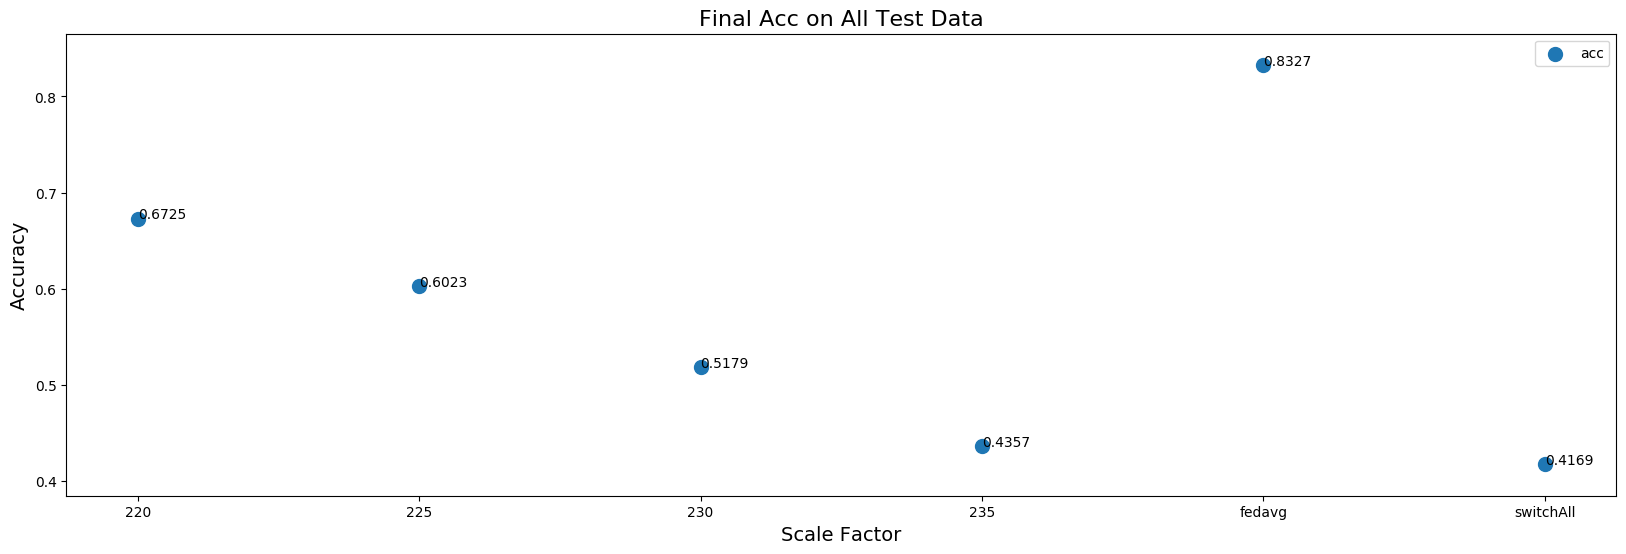

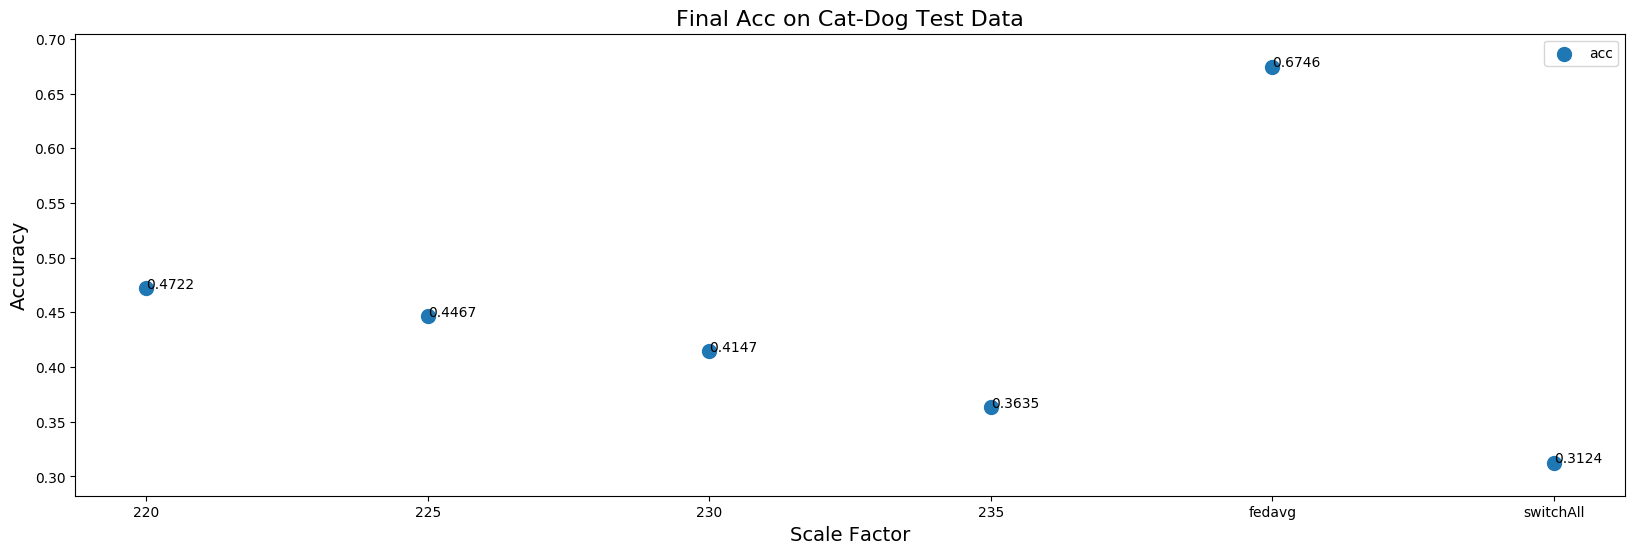

In [61]:
base_path = "/home/ubuntu/Documents/jiarui/experiments/fedavg/gt_epoch200/replace"

scale_set = [scale for scale in range(220, 240, 5)]
scale_set.sort()

labels = [
    str(scale) for scale in scale_set
]

all_label_acc = [
    f"{base_path}/rep_scale{ scale }/eval/all_acc.npy" for scale in scale_set
]

pair_label_acc = [
    f"{base_path}/rep_scale{ scale }/eval/pair_acc.npy" for scale in scale_set
]

all_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_all_acc.npy"
)
pair_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/fedavg_pair_acc.npy"
)
labels.append("fedavg")

all_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_all_acc.npy"
)
pair_label_acc.append(
    "/home/ubuntu/Documents/jiarui/experiments/pFedDef/eval/allSwitch_pair_acc.npy"
)
labels.append("switchAll")



all_label_avg_acc = []
for i in all_label_acc:
    res = np.load(i)
    all_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )

plot_training_curves(
    all_label_avg_acc, labels, F"Final Acc on All Test Data",
    f"fedavg200_all.pdf", "Scale Factor", "Accuracy",
    "acc"
)

pair_label_avg_acc = []
for i in pair_label_acc:
    res = np.load(i)
    pair_label_avg_acc.append(
        np.sum(res) / (res.shape[0] * res.shape[1])
    )

plot_training_curves(
    pair_label_avg_acc, labels, f"Final Acc on Cat-Dog Test Data",
    f"fedavg200_pair.pdf", "Scale Factor", "Accuracy",
    "acc"
)